# Naive Bayes

In [1]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [2]:
def write_answer(number, answer):
    with open(f"answer-{number}.txt", 'w') as file:
        file.write(str(answer))

In [3]:
def print_cvs(bernoulli_cvs, multinomial_cvs, gaussian_cvs):
    print(f"Bernoulli: {bernoulli_cvs.mean()}")
    print(f"Multinomial: {multinomial_cvs.mean()}")
    print(f"Gaussian: {gaussian_cvs.mean()}")

In [4]:
def get_best_cv(bernoulli_cvs, multinomial_cvs, gaussian_cvs):
    b = bernoulli_cvs.mean()
    m = multinomial_cvs.mean()
    g = gaussian_cvs.mean()
    return max([b, m, g])

## Load datasets

In [5]:
cancer_data, cancer_target = load_breast_cancer(return_X_y=True)

In [6]:
cancer_data.shape

(569, 30)

In [7]:
cancer_data[0,:]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [8]:
digits_data, digits_target = load_digits(return_X_y=True)

In [9]:
digits_data.shape

(1797, 64)

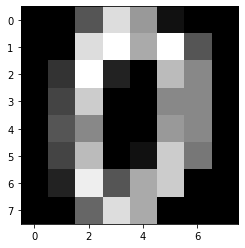

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits_data[0,:].reshape((8,8)), cmap='gray')

## Create default classifiers

In [11]:
bernoulli = BernoulliNB()
multinomial = MultinomialNB()
gaussian = GaussianNB()

## Train on the breast cancer

In [12]:
cv_bernoulli_cancer = cross_val_score(bernoulli, cancer_data, cancer_target)

In [13]:
cv_multinomial_cancer = cross_val_score(multinomial, cancer_data, cancer_target)

In [14]:
cv_gaussian_cancer = cross_val_score(gaussian, cancer_data, cancer_target)

In [15]:
print_cvs(cv_bernoulli_cancer, cv_multinomial_cancer, cv_gaussian_cancer)

Bernoulli: 0.6274181027790716
Multinomial: 0.8963204471355379
Gaussian: 0.9385188635305075


In [16]:
write_answer(1, get_best_cv(cv_bernoulli_cancer, cv_multinomial_cancer, cv_gaussian_cancer))

## Train on the digits

In [17]:
cv_bernoulli_digits = cross_val_score(bernoulli, digits_data, digits_target)

In [18]:
cv_multinomial_digits = cross_val_score(multinomial, digits_data, digits_target)

In [19]:
cv_gaussian_digits = cross_val_score(gaussian, digits_data, digits_target)

In [20]:
print_cvs(cv_bernoulli_digits, cv_multinomial_digits, cv_gaussian_digits)

Bernoulli: 0.8241736304549674
Multinomial: 0.8703497369235531
Gaussian: 0.8069281956050759


In [21]:
write_answer(2, get_best_cv(cv_bernoulli_digits, cv_multinomial_digits, cv_gaussian_digits))

## Summary

- The multinomial distribution performed better on a sample with non-negative integer values of features.
- Normal distribution worked best on real features.

In [22]:
answers = [3,4]
answers = [str(v) for v in answers]

with open("answer-3.txt", 'w') as file:
    file.write(" ".join(answers))